<a href="https://colab.research.google.com/github/vel688/Moringa-week7/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RESEARCH PROBLEM
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 
#a)Understanding context
Real estate is a lucrative business because there is a high demand for good housing among people of a given area. For a real estate company, there is a need take a data driven approach; in order to analyse the factors that affect the prices of houses.
#b)Specifying the question 
In this analysis, I will  explore and analyse the data provided and come up with a model to accurately predict the prices of houses.
#c)Defining the metric of Success
Success will be achieved when I understand the data, identify the best model to predict price where accuracy is highest and error, lowest.
#d)Experimental design
Performing Exploratory Data Analysis

Feature Engineering

Multiple Linear Regression

Quantile regression

Ridge Regression

Lasso Regression

Elastic-Net Regression

Computing the Root mean squared error and R squared values

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion




#UNDERSTANDING DATA
#Importing Libraries

In [155]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet


In [ ]:
#create dataframe df
#load and preview data
df =  pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


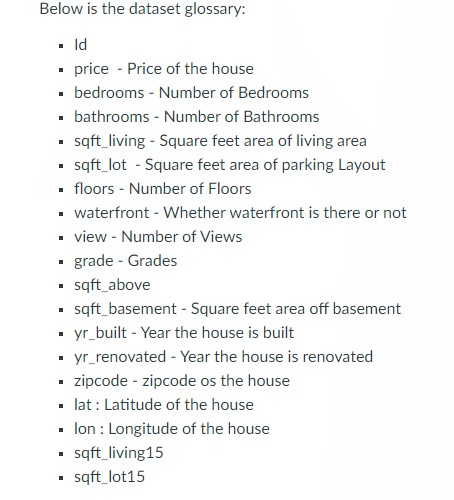

#DATA RELEVANCE
At the moment there is no explanation for what these columns represent: grade, sqft_living15, sqft_loft and sqft_above. They will be dropped if found irrelevant during the analysis.
However, the rest of the columns represent data which is relevant to a real estate company.

In [ ]:
#Find out number of columns and rows 
df.shape

#There are 21613 rows and 20 columns

(21613, 20)

In [ ]:
#Check the data types for all the columns
df.dtypes

#All the data seems to be numerical in nature

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#Get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

#DATA CLEANING
a)consistency

In [ ]:
#check for duplicates
df.duplicated().sum()
#There are 3 duplicates

3

In [ ]:
#get rid of duplicates but retain original value
df.drop_duplicates(subset = None, keep = 'first', inplace = True)
df.shape

(21610, 20)

b)completeness

In [ ]:
#check for null values
df.isnull().sum()

#There are no null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

c)variability

In [ ]:
#create a function that can pass any dataframe
def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    plt.show()

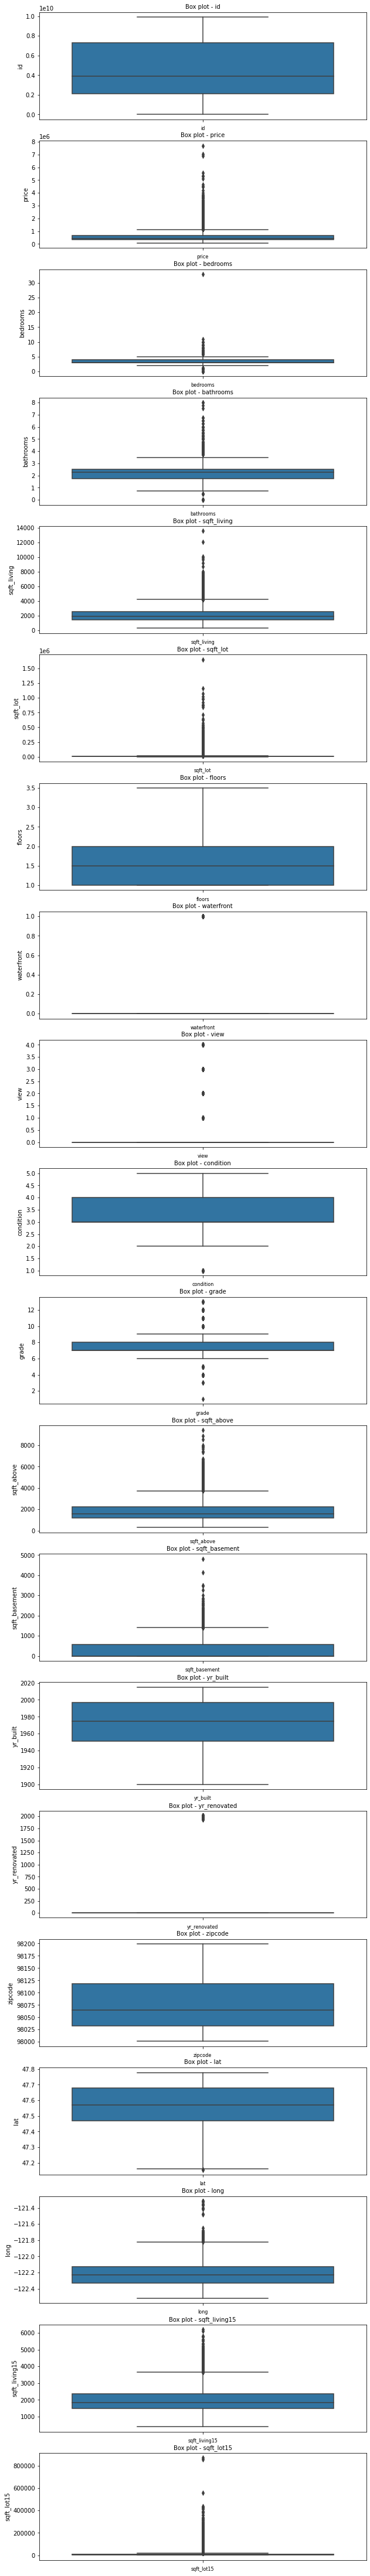

In [ ]:
#Execute the function
col_names = df.columns
target_dataframe = df
plot_boxplots(target_dataframe,col_names)

The columns without any outliers are: id,floors,yr_built and zipcode.
The columns with few outliers are: waterfront,view,grade,condition,yr_renovated.
The columns wuth alot of outliers are: price,bedrooms,bathrooms,sqft_living,sqft_loft,sqft_above,sqft_basement,sqft_living15

d)uniformity

In [ ]:
#check the outlier in bedrooms column
df.bedrooms.unique()
#33 bedrooms is indeed an outlier. It shall be removed for the sake of uniformity


array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [ ]:
#remove outlier
df.drop(df.index[df['bedrooms'] == 33], inplace = True)
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

In [ ]:
#drop unnecessary columns
#we also drop the sqft_living15 ans sqft_loft15because they are not explained so we dont know their meaning
data = df.drop(["id","zipcode","lat","long",'sqft_living15','sqft_lot15'],axis=1)
data.head()
#columns are now 13 instead of 20

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0


#EXPLORATORY DATA ANALYSIS


#a)Univariate

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0


In [ ]:
#Get a brief summary of the description of each column
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
count,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000,21609.000
mean,540174.325,3.369,2.115,2079.902,15108.711,1.494,0.008,0.234,3.409,7.657,1788.383,291.520,1971.005,84.326
std,367395.459,0.908,0.770,918.516,41424.139,0.540,0.087,0.766,0.651,1.176,828.142,442.603,29.373,401.508
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000
25%,321500.000,3.000,1.750,1425.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000
50%,450000.000,3.000,2.250,1910.000,7620.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000
75%,645000.000,4.000,2.500,2550.000,10689.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000
max,7700000.000,11.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000


a)countplots of bedrooms,bathrooms,condition,grade,waterfront,zipcode and view

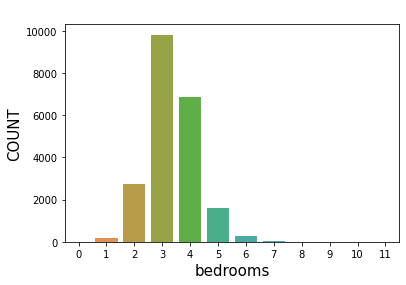

In [ ]:
#visualizing the distributions in the dataset
sns.countplot('bedrooms',data = data)
plt.xlabel("bedrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bedrooms",fontsize=16,color="white")
plt.show()
#The distribution is normal

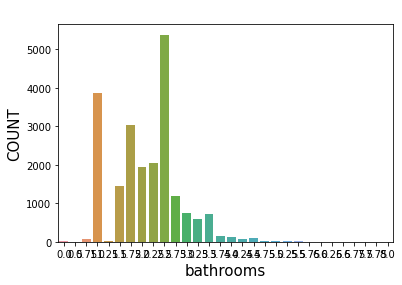

In [ ]:
#visualizing the distribution of bathrooms in the dataset
sns.countplot('bathrooms',data = data)
plt.xlabel("bathrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bathrooms",fontsize=16,color="white")
plt.show()
#The distribution is right skewed

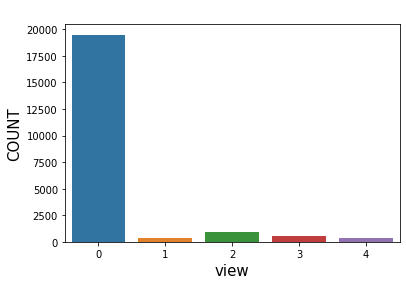

In [ ]:
#view countplot
sns.countplot('view',data = data)
plt.xlabel("view",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of VIEW",fontsize=16,color="white")
plt.show()
#most houses lack a view

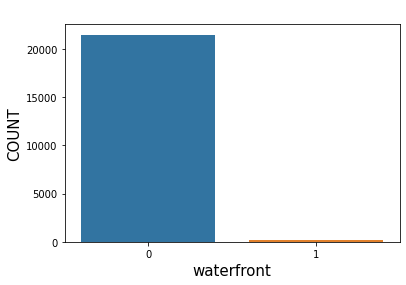

In [ ]:
#waterfront countplot
sns.countplot('waterfront',data = data)
plt.xlabel("waterfront",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of WaterFront",fontsize=16,color="white")
plt.show()
#most houses lack a waterfront

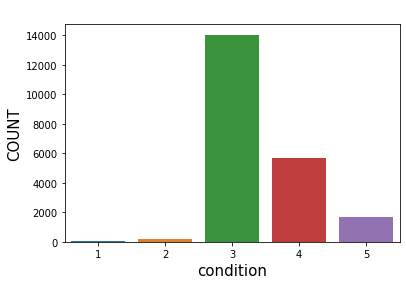

In [ ]:
#the distribution of the condition of houses
sns.countplot('condition',data = data)
plt.xlabel("condition",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Condition",fontsize=16,color="white")
plt.show()
#The distribution is right skewed
#most houses are of about medium quality of 3 out of 5

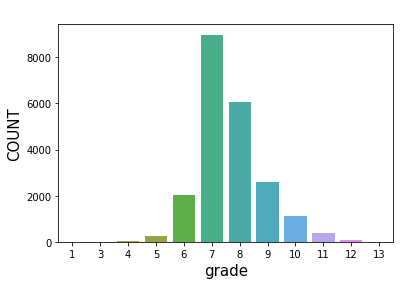

In [ ]:
#distribution of the grades of houses
sns.countplot('grade',data = data)
plt.xlabel("grade",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Grade",fontsize=16,color="white")
plt.show()
#most houses are graded quality 7 which is about medium quality

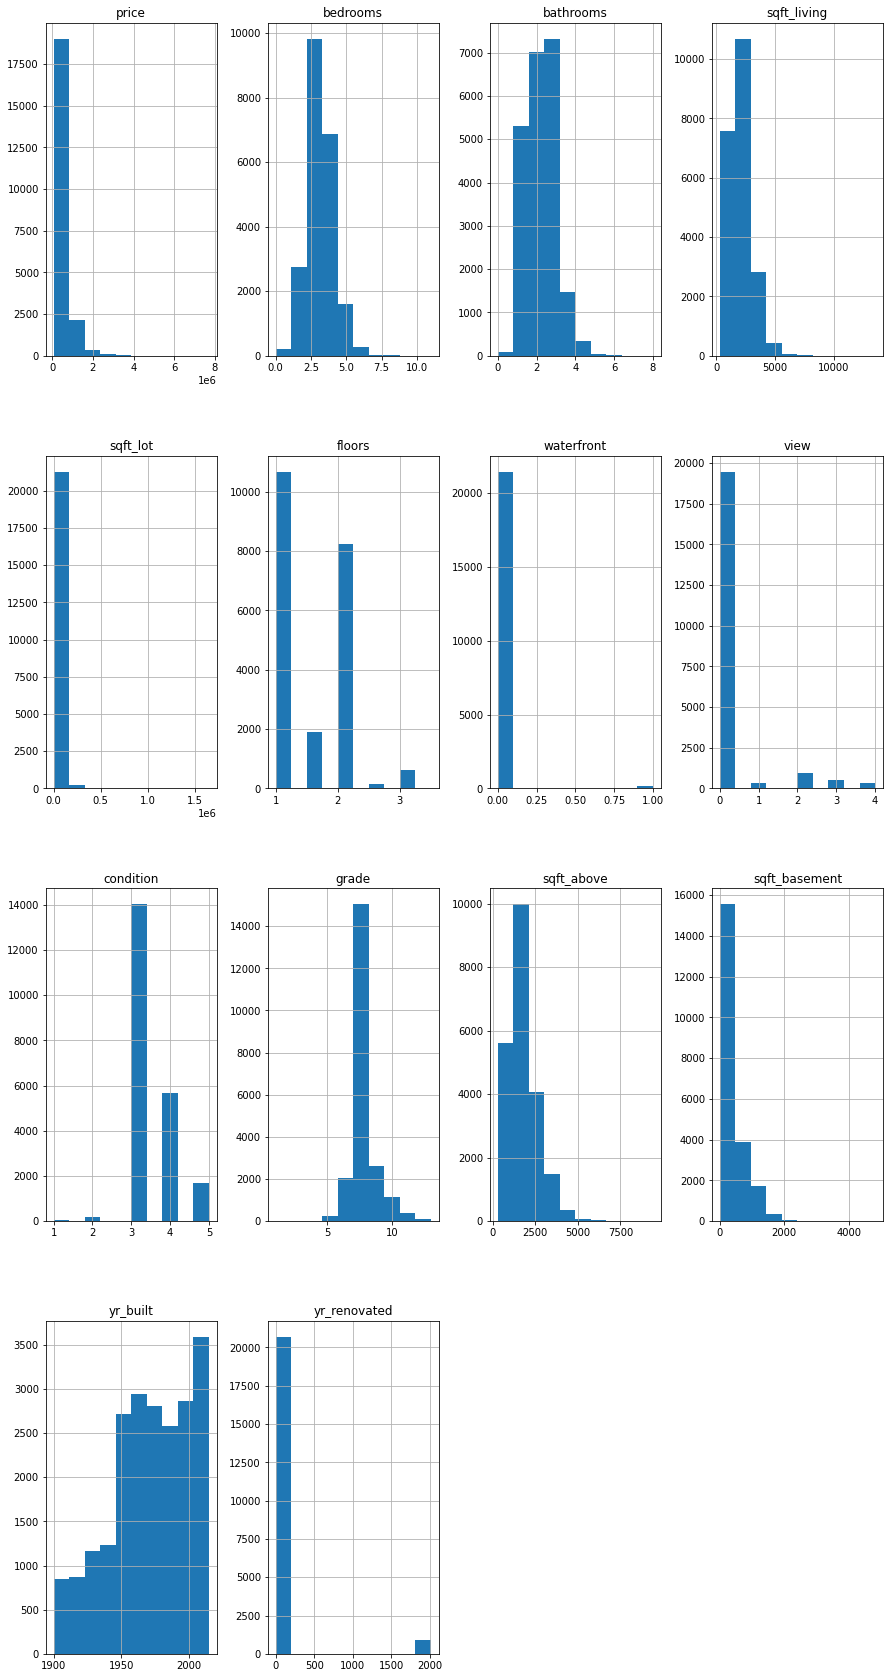

In [ ]:
from matplotlib import pyplot
names = data.columns
data.hist(figsize=(15,30))

pyplot.show()

#b)Bivariate Analysis

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Price Vs Year built')

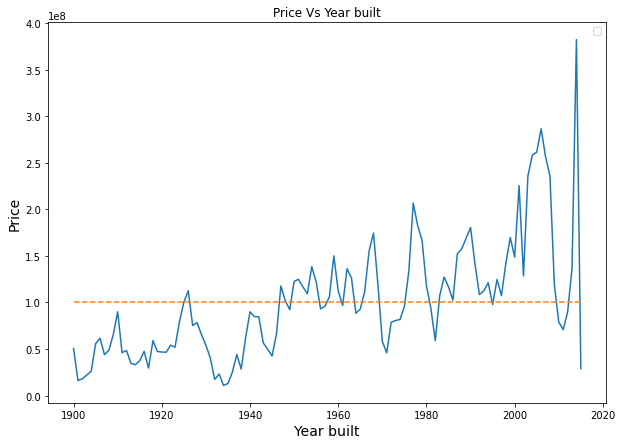

In [ ]:
# group by year built
data_line=data.groupby(['yr_built']).sum().reset_index()
# line gragh for both  return and taken

x=data_line['yr_built']
y=data_line['price']

fig, ax = plt.subplots(sharex='col', sharey='row', figsize=[10,7])
ax.plot(x,y)

# Calculate the simple average of the data
y_mean = [np.mean(y)]*len(x)

ax.plot(x,y_mean, linestyle='--')

# Make a legend
ax.legend(loc='upper right')

ax.set_xlabel('Year built', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Price Vs Year built')

KeyboardInterrupt: ignored

<Figure size 576x576 with 0 Axes>

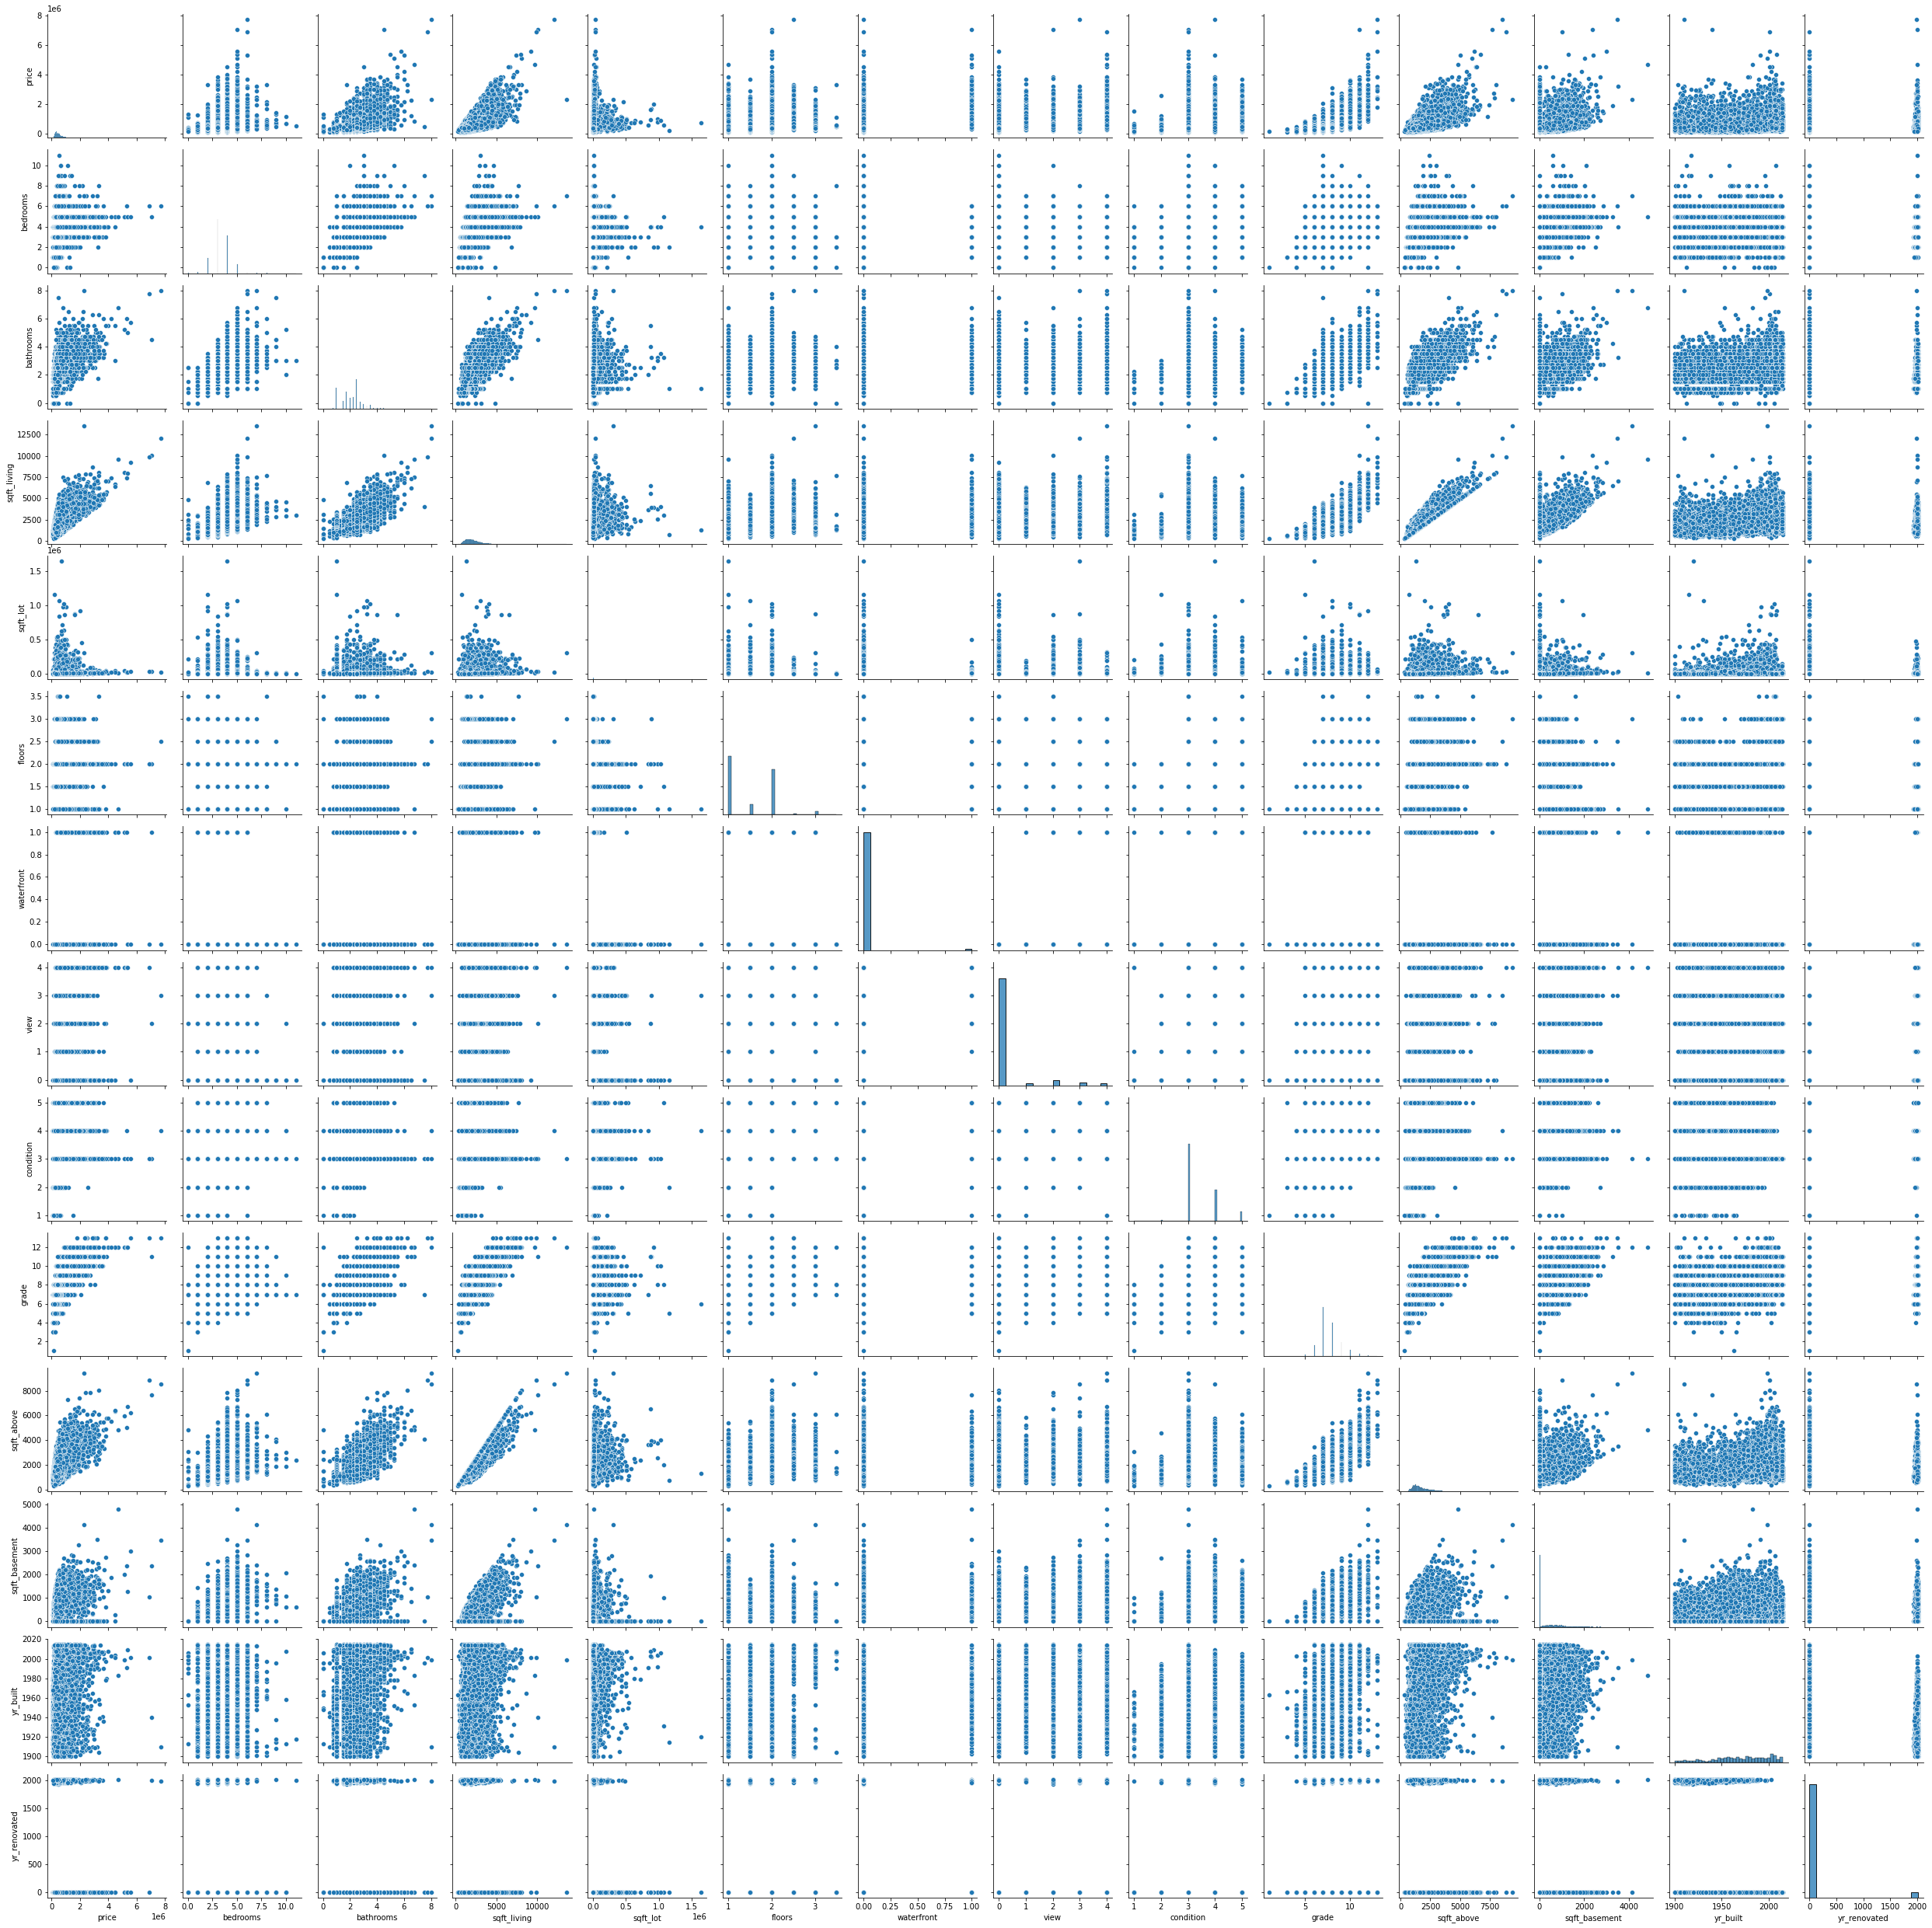

In [ ]:
#a scatter plothowing how all variables correlate with each other
plt.figure(figsize = (8,8))
sns.pairplot(data)
plt.show()

It is difficult to identify a column from all these figures, therefore, specific plots are shown below

Text(0.5, 1.0, 'price vs number of bedrooms')

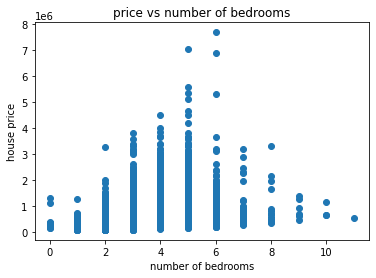

In [ ]:
#plot price vs the number of bedroom
plt.scatter(data["bedrooms"],data["price"])
plt.ylabel("house price")
plt.xlabel("number of bedrooms")
plt.title("price vs number of bedrooms")

Text(0.5, 1.0, 'price vs bathrooms')

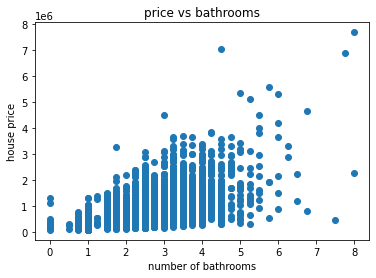

In [ ]:
plt.scatter(data["bathrooms"],data["price"])
plt.ylabel("house price")
plt.xlabel("number of bathrooms")
plt.title("price vs bathrooms")

Text(0.5, 1.0, 'price vs sqft_living')

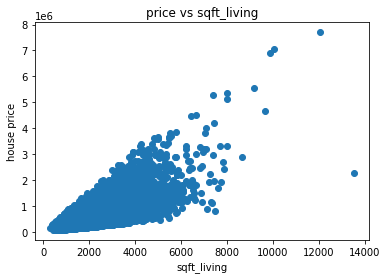

In [ ]:
plt.scatter(data["sqft_living"],data["price"])
plt.ylabel("house price")
plt.xlabel("sqft_living")
plt.title("price vs sqft_living")

Text(0.5, 1.0, 'price vs view')

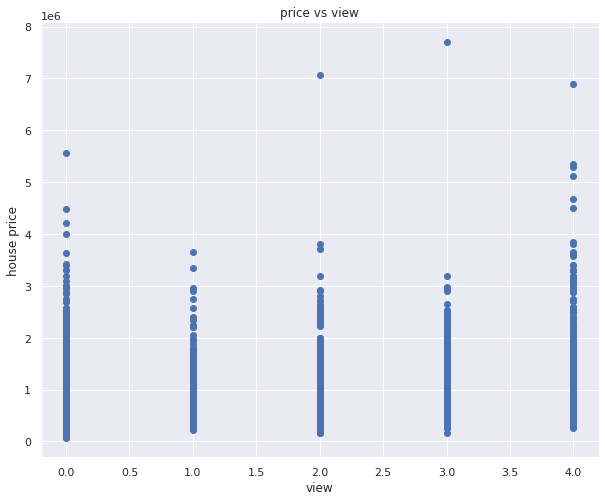

In [ ]:
plt.scatter(data["view"],data["price"])
plt.ylabel("house price")
plt.xlabel("view")
plt.title("price vs view")

Text(0.5, 1.0, 'price vs floors')

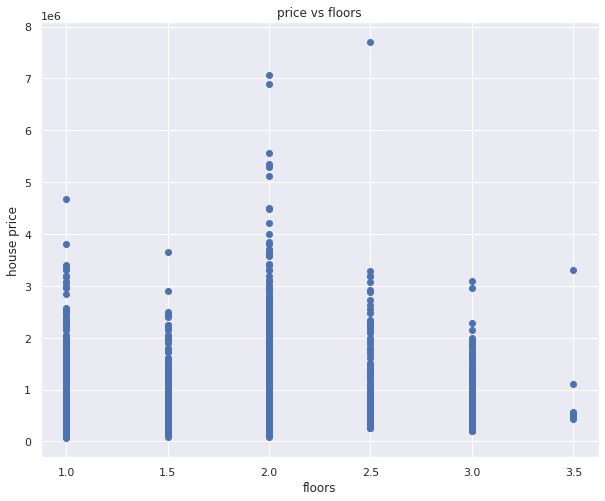

In [ ]:
plt.scatter(data["floors"],data["price"])
plt.ylabel("house price")
plt.xlabel("floors")
plt.title("price vs floors")

Text(0.5, 1.0, 'price vs sqft_living')

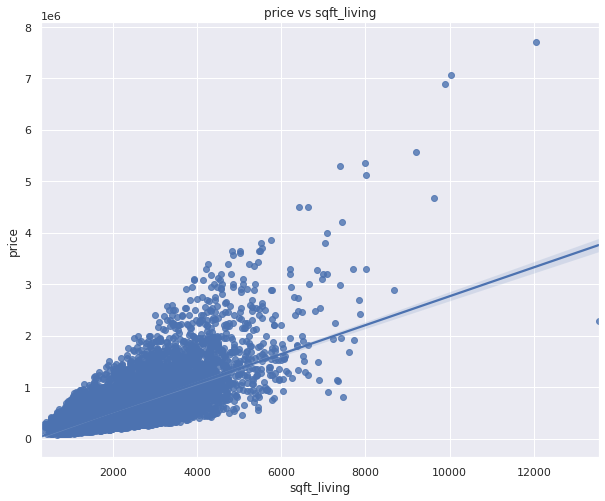

In [ ]:
sns.set(rc={"figure.figsize":(10,8)})
sns.regplot(x=data["sqft_living"],y=data["price"],fit_reg=True)
plt.title("price vs sqft_living")

Text(0.5, 1.0, 'price vs ssqft_basement')

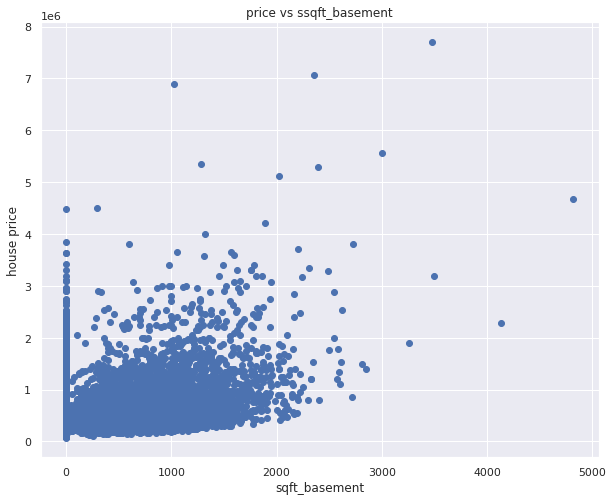

In [ ]:
plt.scatter(data["sqft_basement"],data["price"])
plt.ylabel("house price")
plt.xlabel("sqft_basement")
plt.title("price vs ssqft_basement")

Text(0.5, 1.0, 'price vs yr_built')

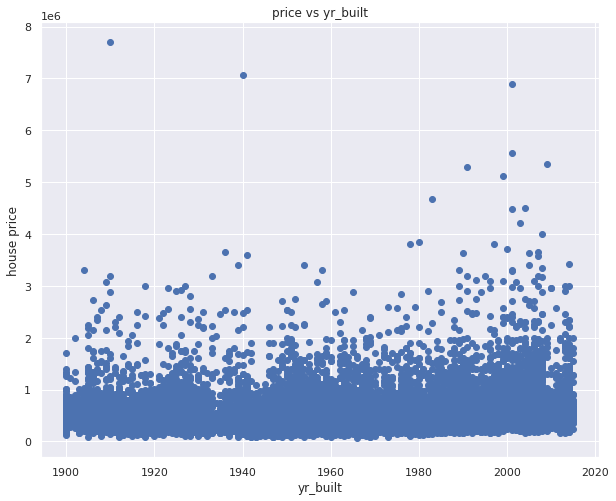

In [ ]:
plt.scatter(data["yr_built"],data["price"])
plt.ylabel("house price")
plt.xlabel("yr_built")
plt.title("price vs yr_built")

Text(0.5, 1.0, 'price vs grade')

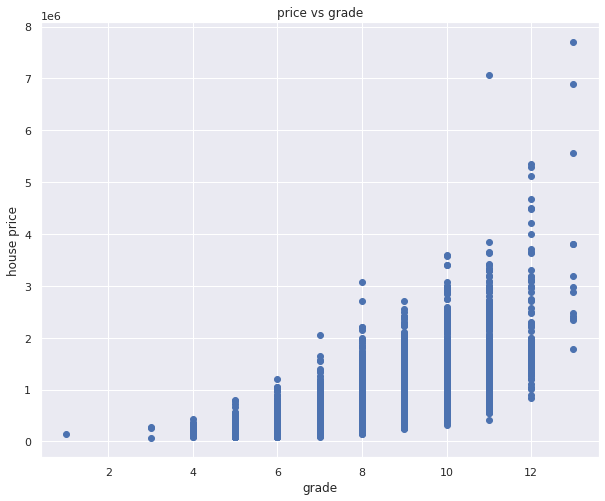

In [ ]:
plt.scatter(data["grade"],data["price"])
plt.ylabel("house price")
plt.xlabel("grade")
plt.title("price vs grade")

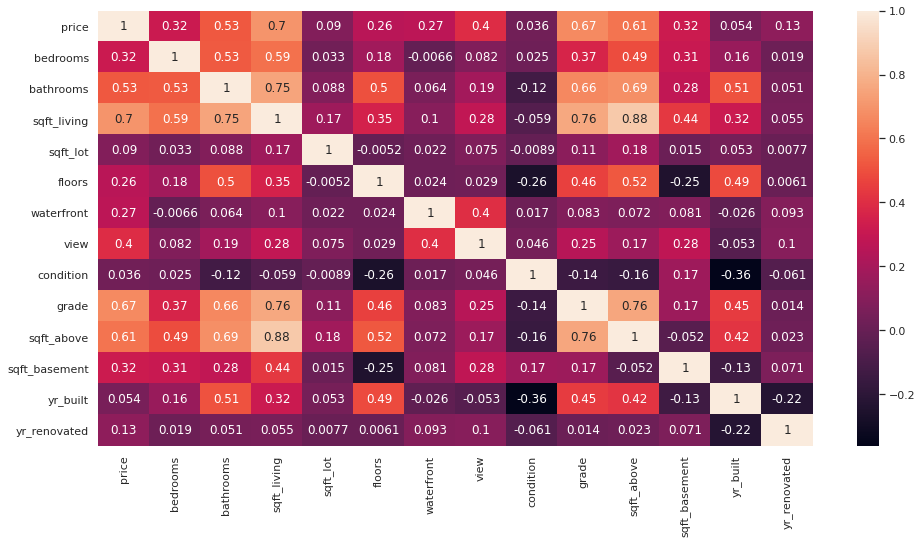

In [ ]:
#heatmap
plt.figure(figsize=(16, 8))

vg_corr = data.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [ ]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000,0.315,0.525,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054,0.127
bedrooms,0.315,1.000,0.529,0.591,0.033,0.181,-0.007,0.082,0.025,0.367,0.491,0.309,0.159,0.019
bathrooms,0.525,0.529,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.506,0.051
sqft_living,0.702,0.591,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055
sqft_lot,0.090,0.033,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.053,0.008
floors,0.257,0.181,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.489,0.006
waterfront,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093
view,0.397,0.082,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.103
condition,0.036,0.025,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.361,-0.061
grade,0.667,0.367,0.665,0.763,0.114,0.458,0.083,0.251,-0.145,1.000,0.756,0.168,0.447,0.014


When the value of the correlation coefficient is close to zero, generally between -0.1 and +0.1, the variables are said to have no linear relationship or a very weak linear relationship.Correlation coefficients between -.20 and .20 are generally considered weak, between .20 and .50 (positive or negative) are considered moderate, and above .50 (positive or negative) are considered strong

There is a strong relationship of 0.76 between sqft_living15 and sqft_living
A strong relationship of 0.72 also exists between  sqft_lot and sqft_loft15

Hence,they will be peforming the same task when we build a model
We can therefore remove one of them 

#c)Multivariate analysis
:Linear discriminant analysis(LDA)

In [ ]:
X= data.drop(['price'], axis=1)
y = data['price']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#standardise the data

#initialise it
lda = LDA()

lda_= lda.fit(X, y)
lda_feat = lda_.transform(X)

#show co-efficients of the columns
lda_.coef_

array([[-2.72216423e+00, -5.79372132e+00,  3.30472597e-03, ...,
         1.35052930e-03,  1.86315985e-01,  4.73345926e-04],
       [-9.97776459e-01,  3.65064435e-01,  2.32350523e-05, ...,
        -7.37227511e-04, -1.67902685e-02, -2.73911451e-03],
       [-3.03713894e+00,  1.47129907e+00,  8.58379165e-04, ...,
        -4.51524263e-04, -4.30086898e-02, -3.09992326e-03],
       ...,
       [-7.31353339e+00,  1.34528526e+01,  1.26523157e-02, ...,
        -3.06186228e-03, -3.12566126e-01, -3.84003576e-03],
       [-8.00720177e+00, -4.53200811e+00,  2.08415384e-02, ...,
         1.40351807e-02, -2.30493168e-01,  8.31841673e-03],
       [-1.11671286e+01,  9.61186806e+00,  2.03038978e-02, ...,
         1.46134642e-02, -4.55230917e-01,  7.06110423e-03]])

In [ ]:
feat_matters = pd.DataFrame(index=X.columns.values, data = lda_.coef_[0].T)
feat_matters.sort_values(0, ascending =False)

,0
floors,0.334
yr_built,0.186
sqft_living,0.003
sqft_above,0.003
sqft_basement,0.001
yr_renovated,0.000
sqft_lot,0.000
view,-0.047
condition,-1.352
bedrooms,-2.722


#FEATURE ENGINEERING

In [ ]:
def renovated(x):
  if x > 0:
    return '1'
  else:
    return '0'

# yes=1 and no=0 for new renovated column
data['renovated'] = data.yr_renovated.apply(lambda x: renovated(x))
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,renovated
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,0
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,1
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,0
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,0
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,0


In [ ]:
data = data.drop(['yr_renovated'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0


#TESTING FOR MULTICOLINEARITY

In [ ]:
correlations = data.corr()
correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
price,1.000,0.315,0.525,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054
bedrooms,0.315,1.000,0.529,0.591,0.033,0.181,-0.007,0.082,0.025,0.367,0.491,0.309,0.159
bathrooms,0.525,0.529,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.506
sqft_living,0.702,0.591,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318
sqft_lot,0.090,0.033,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.053
floors,0.257,0.181,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.489
waterfront,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026
view,0.397,0.082,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053
condition,0.036,0.025,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.361
grade,0.667,0.367,0.665,0.763,0.114,0.458,0.083,0.251,-0.145,1.000,0.756,0.168,0.447


In [ ]:
#inverse of the correlation
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
price,2.881,0.304,-0.290,-0.713,0.085,-0.104,-0.390,-0.271,-0.092,-1.142,-0.481,-0.260,0.836
bedrooms,0.304,1.726,-0.512,0.192,0.117,0.059,0.027,0.097,-0.078,0.227,-1.212,-0.652,0.174
bathrooms,-0.290,-0.512,3.322,-1.245,0.021,-0.705,0.030,-0.011,-0.083,-0.160,0.071,-0.397,-0.884
sqft_living,-0.707,0.188,-1.232,-48130376804046.242,0.001,0.937,0.072,-0.269,-0.644,-0.358,43394767450341.992,23192436725921.156,0.226
sqft_lot,0.085,0.117,0.021,0.001,1.064,0.140,0.005,-0.057,-0.008,0.048,-0.417,-0.067,-0.019
floors,-0.104,0.059,-0.705,0.943,0.140,1.879,-0.000,-0.020,0.145,-0.184,-1.026,0.185,-0.281
waterfront,-0.390,0.027,0.030,0.073,0.005,-0.000,1.251,-0.453,0.008,0.220,0.005,0.050,-0.104
view,-0.271,0.097,-0.011,-0.271,-0.057,-0.020,-0.453,1.405,0.008,-0.152,0.239,-0.125,0.120
condition,-0.092,-0.078,-0.083,-0.644,-0.008,0.145,0.008,0.008,1.190,0.035,0.661,0.260,0.364
grade,-1.142,0.227,-0.160,-0.335,0.048,-0.184,0.220,-0.152,0.035,3.447,-1.215,-0.281,-0.752


the VIF score for sqft_above and sqft_basement have high multicolinearlinity

#1. MODEL1: Multiple linear regression

Multiple linear regression requires the following conditions
1.No or low multicollinearity
2.Homoscedasticity
3.Normality
4.Independent variables should be independent

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
# Fit Linear Regression model to the dataset

y = np.log(data.price) #dependent variable
X = data.drop(['price'], axis=1) #independent variables

#splitting the dataset into train and test.
#the test data is 33% while the train data is 67%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

regressor = linear_model.LinearRegression(fit_intercept = True, normalize = True)
regressor.fit(X, y)

print('Intercept: \n', regressor.intercept_)

print('Coefficients: \n', regressor.coef_)

Intercept: 
 21.160061996400813
Coefficients: 
 [-2.53888596e-02  7.59435275e-02  8.42076396e-05 -2.48609775e-08
  1.04449658e-01  3.30627520e-01  4.72259580e-02  4.09184428e-02
  2.27137649e-01  6.64966047e-05  1.29858818e-04 -5.36167349e-03
  1.84595167e-02]


In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))
#the mean squred error for the model is quite low hence confirming the previous findings of its predictive 
#capabilities given by the accuracy score

RMSE is: 
 0.08863348825950293


Text(0.5, 1.0, 'Linear Regression Model')

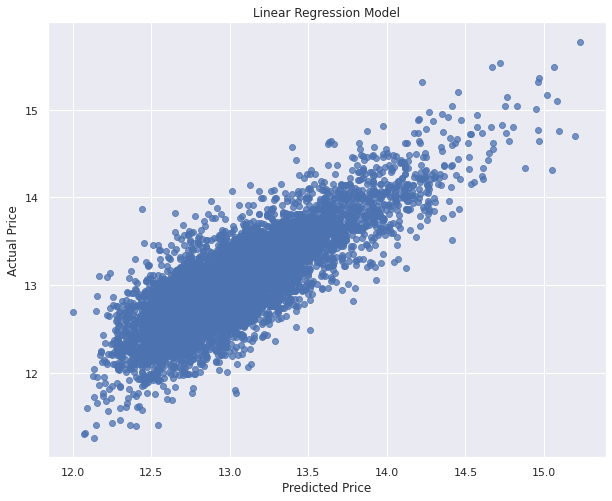

In [ ]:
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

In [ ]:
#check how accurate our model is

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23547665104553125
Mean Squared Error: 0.08863348825950293
Root Mean Squared Error: 0.29771376901228963


In [ ]:
r2_score(y_test,y_pred)

0.6804945540938374

###Residual plots

In [ ]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.0019227921597537985

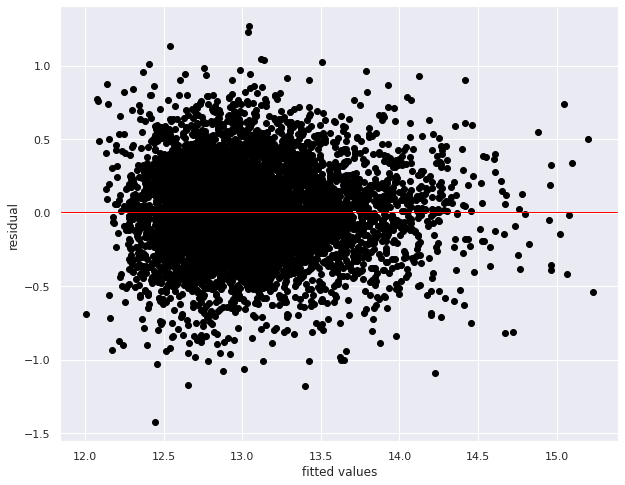

In [ ]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

There is a random scattered pattern around 0 idicating low heteroskedasticity





##Barlett's test

In [ ]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('VARIANCES ARE HOMOGENOUS')



inf
VARIANCES ARE HOMOGENOUS


#MODEL2:Quantile Regression

In [ ]:
#Separating training and testing datasets using numerical data
X = data['view']
y = data['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=24)
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', data)
res = mod.fit(q=.8)
  # Then print out the summary of our model
  #
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.09633
Model:                       QuantReg   Bandwidth:                   3.344e+04
Method:                 Least Squares   Sparsity:                    1.184e+06
Date:                Fri, 19 Feb 2021   No. Observations:                21609
Time:                        17:33:33   Df Residuals:                    21607
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6.5e+05   3376.062    192.532      0.000    6.43e+05    6.57e+05
X           2.575e+05   4327.019     59.510      0.000    2.49e+05    2.66e+05


In [ ]:
# Making Predictions
# 
pred = res.predict(data)
# To compare the actual output values for X_test with the predicted values
# 
B1 = pd.DataFrame({'Actual': y, 'Predicted': pred})
B1

,Actual,Predicted
0,221900.000,650000.000
1,538000.000,650000.000
2,180000.000,650000.000
3,604000.000,650000.000
4,510000.000,650000.000
...,...,...
21608,360000.000,650000.000
21609,400000.000,650000.000
21610,402101.000,650000.000
21611,400000.000,650000.000


In [137]:
r2_score(y, pred)

-361321454207.4514

##Hyperparameter tuning

a)using quantile 0.2

In [ ]:
#Using Quantile 0.2,
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=24)
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.2 quantile
#
mod = smf.quantreg('y ~ X', data)
res = mod.fit(q=.2)
  # Then print out the summary of our model
  #
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.03266
Model:                       QuantReg   Bandwidth:                   3.387e+04
Method:                 Least Squares   Sparsity:                    4.929e+05
Date:                Fri, 19 Feb 2021   No. Observations:                21609
Time:                        17:35:46   Df Residuals:                    21607
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.888e+05   1400.842    206.155      0.000    2.86e+05    2.92e+05
X           8.811e+04   1724.642     51.086      0.000    8.47e+04    9.15e+04


In [ ]:
# Making Predictions
# 
pred = res.predict(data)
# To compare the actual output values for X_test with the predicted values
# 
model2 = pd.DataFrame({'Actual': y, 'Predicted': pred})
model2

,Actual,Predicted
0,221900.000,288790.000
1,538000.000,288790.000
2,180000.000,288790.000
3,604000.000,288790.000
4,510000.000,288790.000
...,...,...
21608,360000.000,288790.000
21609,400000.000,288790.000
21610,402101.000,288790.000
21611,400000.000,288790.000


In [ ]:
r2_score(y, pred)

-0.28218955025074544

b)using other quantiles

In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

     qt  intercept     x_coef  cf_lower_bound  cf_upper_bound
0 0.100 240000.000  65000.000       61975.664       68024.336
1 0.200 288790.000  88105.000       84724.574       91485.426
2 0.300 334998.000 109911.000      106155.199      113666.801
3 0.400 381000.000 124500.000      119999.348      129000.652
4 0.500 432500.000 143750.000      139057.692      148442.308
5 0.600 490000.000 170000.000      163990.598      176009.402
6 0.700 559000.000 208000.000      201620.372      214379.628
7 0.800 650000.000 257500.000      249018.723      265981.277
8 0.900 807000.000 348250.000      335806.170      360693.830


In [126]:
r2_score(y, pred)

-361321454207.4514

ValueError: ignored

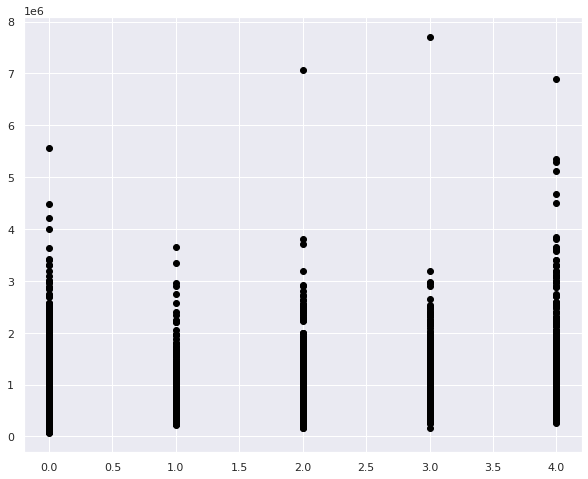

In [ ]:
plt.figure()
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue',
         linewidth=3, label='Lin Reg')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

#MODEL3:Ridge Regression

In [138]:
#create the features 
X = data.drop('price', 1)
y = np.log(data['price'])

In [139]:
#perform a train and a test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [140]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [141]:
#determine the strength of the model using best params and best score
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.001}
abs(search.best_score_) 

#best_score is mean squared error
#alpha of 0.001 has been chosen


0.09812487608283976

In [142]:
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X)
first_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(first_model)

0.09798998402782573


In [143]:
from sklearn.metrics import r2_score
R_squared_value = r2_score(y, y_pred)
R_squared_value

0.6469718542546046

In [144]:

y_pred=ridge.predict(X)

In [145]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 8.461412183261049e-05,
 'bedrooms': 0.07740093977831265,
 'condition': 0.2252888705940803,
 'floors': 0.3126962380828549,
 'grade': 6.742029863256342e-05,
 'price': -0.022797611879160695,
 'sqft_above': 0.0001258906186033789,
 'sqft_basement': -0.005326186066465215,
 'sqft_living': -4.6544536175074175e-08,
 'sqft_lot': 0.10151044790771266,
 'view': 0.04359194337762287,
 'waterfront': 0.04969161573452075,
 'yr_built': 0.017771827456234693}

#Hyperparameter tuning

In [146]:
# We can confirm this by fitting our model with the ridge information and finding the
# mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_train , y_train)
second_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(second_model)

0.09812498489903823


In [147]:
ridge = Ridge(normalize=True,alpha=1)
ridge.fit(X_train , y_train)
third_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(third_model)

0.12219245902450578


In [148]:
ridge = Ridge(normalize=True,alpha=10)
ridge.fit(X_train , y_train)
fourth_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(fourth_model)

0.20841183720711756


In [149]:
ridge = Ridge(normalize=True,alpha=100)
ridge.fit(X_train , y_train)
fifth_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(fifth_model)

0.2718195710709773


In [150]:
# We can confirm this by fitting our model with the ridge information and finding the
# mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.1)
ridge.fit(X_train , y_train)
last_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(last_model)

0.09986766977955507


The lowest RMSE score is given by alpha = 0.001

#MODEL4:Lasso Regression

 
It is better  in reducing the variance in the models

In [151]:
#create the features 
X = data.drop('price', 1)
y = np.log(data['price'])

In [152]:
# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [156]:
# Creating lasso object
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.0
lasso MSE: 0.2775698912644101
lasso coef: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [157]:
#Splitting the data into training and test sets and choose your parameters with GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.5090084506974448
linear score: 0.640038878846831
lasso MSE: 0.13407557377673174
linear MSE: 0.09829495828285051
lasso best estimator coef: [ 0.          0.          0.14343244  0.          0.          0.
  0.00061792  0.          0.16254605  0.          0.         -0.
  0.        ]
linear coef: [-0.02093387  0.05776199  0.07686732  0.00118644  0.05731333  0.02788178
  0.03773614  0.02472847  0.26693429  0.05482383  0.05694035 -0.15783126
  0.00337723]


Our accuracy is 50.9% With the best alpha of 0.1

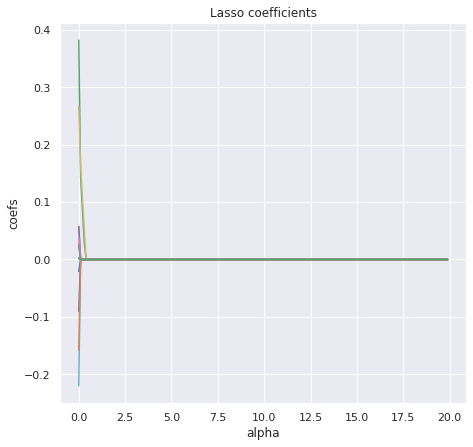

In [158]:

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# as seen Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes.

#MODEL5:Elastic Net Regression

This regression implements both the Lasso and Ridge Regression

In [159]:
#create the features 
X = data.drop('price', 1)
y = np.log(data['price'])

In [160]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [161]:
#lets fit the best params and best score
search.fit(X,y)
search.best_params_
abs(search.best_score_)

0.09887942019154818

The params chooses 0.00001 as our alpha and a l1_ratio of 0.8

The elastic net regression has a MSE OF 0.09887

##Hyperparameter tuning

In [162]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

0.09839941511930295


In [163]:
#COEFFICIENTS
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 0.06955810527019941,
 'bedrooms': -0.018628141337198333,
 'condition': 0.04140866211284808,
 'floors': 0.0959840878594258,
 'grade': 0.20561277224215319,
 'renovated': 0.03276194068843834,
 'sqft_above': 6.738759559504989e-05,
 'sqft_basement': 0.00012163827473441664,
 'sqft_living': 9.487726133544353e-05,
 'sqft_lot': -0.0,
 'view': 0.05173810097230708,
 'waterfront': 0.3105125078825651,
 'yr_built': -0.004709902831704187}

In [164]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X_train,y_train)
elastic_model3=elastic.score(X_test,y_test)
print(elastic_model3)

0.2791557433379578


#CONCLUSION

##Summary of EDA.

Most of the houses had 3 bedrooms,grade 7 and condition 3.Most did not have a view or waterfront.The data was highly skewed except the data for grade column, Price was seen to increase over the years especially between 2000-2020, suggesting that houses appreciate over time.

Most of the columns had medium or no correlation but there were some with high correlation like bathroom and price, bedroom and sqft_living,sqft_loft and floors.


Moreso,there was low multicolinearlity among the variables except sqft_above and sqft_basement which was very high.This may contribute to high root mean square value in the model

Linear discriminant analysis singled out these factors to be the top five factors that influence house prices:
renovated	
floors	
yr_built	
sqft_living	
sqft_above	
sqft_basement	

##Summary of Modeling

R=model with ridge regression had the least RMSE of 0.09812 and the highest accuracy of 64.69% It is the most recommended model to use. Followed by elastic net and then lasso.

##Recommendations
Remove outliers from the data, carry out reduction on multilinear regression and ensure conditions for a specific model are met like normal distribution 

##FOLLOW UP

Did we have the right data? Yes, the data was relevant to the analysis.it was however, full of anomalies.




Do we need more data? Yes, more features improve our model.

1.   List item
2.   List item



Did we answer the question? Yes. ridge regression was the best model for our prediction.